# Notebook - Alex Grieve - Tuna Fishing Monitoring

# IMPORTS

In [1]:
import tensorflow as tf # using for image classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2 # to aid in reading images

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

from tensorflow.keras.preprocessing.image import ImageDataGenerator # used to transform data
from tensorflow.keras.preprocessing import image
from tensorflow import keras # NN
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D
from tensorflow.keras import layers


In [2]:
# using splitfolders to split data into test, train, and validation sets, since data
# is made up of all images, this allows for randomized splitting of images
import splitfolders

splitfolders.ratio('data/',
                   output='data/split_data/',
                   seed=42,
                   ratio=(.7, .2, .1), # 70% train, 20% validation, 10% test
                   group_prefix=None,
                   move=False 
                   )

Copying files: 3025 files [00:08, 375.10 files/s]


# IMAGE RE-SIZING + CREATING X,Y VARIABLES

In [3]:
img = image.load_img('data/split_data/train/ALB/img_00003.jpg')

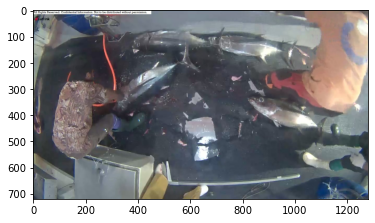

In [4]:
plt.imshow(img) # see the raw images to guage sizing of them

In [5]:
# used to standardize sizing of images
img_width = 200
img_height = 200

In [6]:
test_path = "data/split_data/test"
val_path = "data/split_data/val"
train_path = "data/split_data/train"

In [7]:
# creating X values (i.e. the images) for each set of data

x_train=[]

for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(img_width,img_height))
        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(img_width,img_height))
        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(img_width,img_height))
        x_val.append(img_arr)

In [8]:
# converting the X sets into numpy arrays

train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [9]:
# 255 is standard max sizing, do dividing by 255 to have all numbers in
# numpy array be between 0 and 1

train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [10]:
# transforming data using ImageDataGenerator, and re-scaling by standaridzed 255 sizing

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# creating the datasets

train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (img_width, img_height),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (img_width, img_height),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (img_width, img_height),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 2114 images belonging to 8 classes.
Found 309 images belonging to 8 classes.
Found 602 images belonging to 8 classes.


In [12]:
# using the class labels as the y values in each set

train_y = train_set.classes
test_y = test_set.classes
val_y = val_set.classes

In [13]:
train_set.class_indices

{'ALB': 0,
 'BET': 1,
 'DOL': 2,
 'LAG': 3,
 'NoF': 4,
 'OTHER': 5,
 'SHARK': 6,
 'YFT': 7}

In [14]:
train_y.shape,test_y.shape,val_y.shape

((2114,), (309,), (602,))

# DATA VISUALIZATION

<ipython-input-15-e91778eb0cf0>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(3,3,i+1)


IndexError: index 2 is out of bounds for axis 0 with size 2

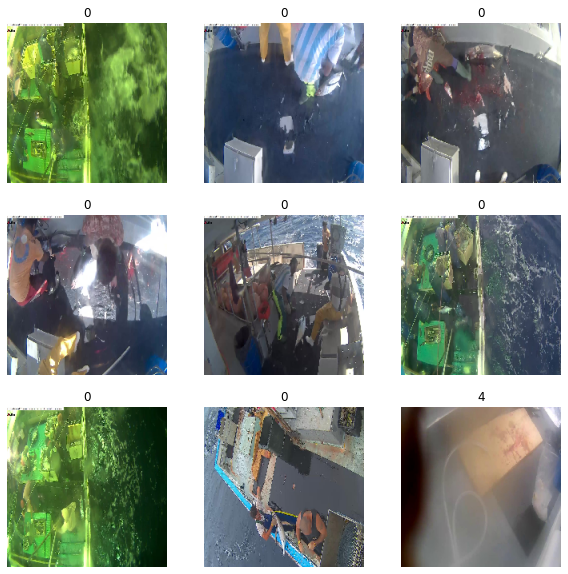

In [15]:
# visualizing the iamges and their labels

plt.figure(figsize=(10,10))
for images, labels in train_set:
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        plt.title(int(labels[i]))
        plt.axis("off")

<ipython-input-16-e91778eb0cf0>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(3,3,i+1)


IndexError: index 2 is out of bounds for axis 0 with size 2

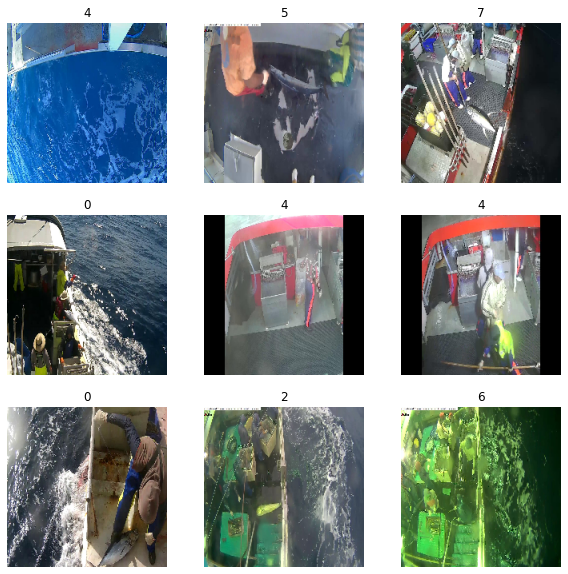

In [16]:
# repeat of visualziing images and labels for variety

plt.figure(figsize=(10,10))
for images, labels in train_set:
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        plt.title(int(labels[i]))
        plt.axis("off")

# SEQUENTIAL MODEL

In [17]:
# utilizing the Sequential model with 3 layers

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',
                                                           input_shape = (img_width,img_height,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(8, activation = 'softmax')
                                                           ])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [19]:
# utilizing adam optimizer to compile model as researched it was best option
# for sparse gradients

model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [20]:
# preivoulsy ran witout an earlystopping and model seemed to overfit itself
# this allows for the model to stop if unnessary number of epochs given

from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [21]:
# model was able to hit 89% accuracy, this could be very close to overfitting

model_fit = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/10
67/67 [==============================] - 66s 965ms/step - loss: 1.7276 - accuracy: 0.4588 - val_loss: 1.5588 - val_accuracy: 0.4917
Epoch 2/10
67/67 [==============================] - 67s 979ms/step - loss: 1.3579 - accuracy: 0.5539 - val_loss: 1.2838 - val_accuracy: 0.6013
Epoch 3/10
67/67 [==============================] - 60s 891ms/step - loss: 1.0598 - accuracy: 0.6481 - val_loss: 1.1495 - val_accuracy: 0.6312
Epoch 4/10
67/67 [==============================] - 54s 807ms/step - loss: 0.8074 - accuracy: 0.7034 - val_loss: 1.0895 - val_accuracy: 0.6429
Epoch 5/10
67/67 [==============================] - 54s 811ms/step - loss: 0.6385 - accuracy: 0.7649 - val_loss: 1.1400 - val_accuracy: 0.6478
Epoch 6/10
67/67 [==============================] - 54s 804ms/step - loss: 0.5114 - accuracy: 0.7956 - val_loss: 1.3951 - val_accuracy: 0.6860
Epoch 7/10
67/67 [==============================] - 53s 795ms/step - loss: 0.4128 - accuracy: 0.8439 - val_loss: 1.2894 - val_accuracy: 0.6512

# VISUALIZING SEQUENTIAL MODEL RESULTS

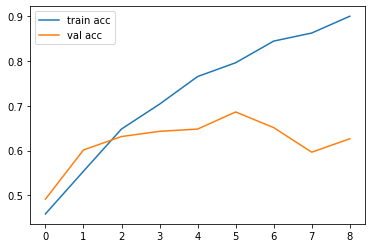

In [22]:
# graphing accuracies of training and validation datasets

plt.plot(model_fit.history['accuracy'], label='train acc')

plt.plot(model_fit.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()

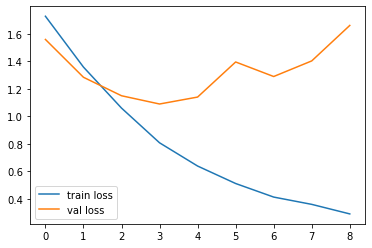

In [23]:
# graphing losses of training and validation datasets

plt.plot(model_fit.history['loss'], label='train loss')
plt.plot(model_fit.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [24]:
# evaluation of model on testing data reveals about 60% accuracy

model.evaluate(test_x,test_y,batch_size=200)

2/2 [==============================] - 4s 701ms/step - loss: 1.7294 - accuracy: 0.6052


[1.7293542623519897, 0.6051779985427856]

In [25]:
# created for classification report

y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

10/10 [==============================] - 2s 174ms/step


In [26]:
# classification report, model not running well with indices 1,2,3
# more images or work needed on these image groups

print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71       137
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.42      0.27      0.33        59
           5       0.88      0.78      0.82        27
           6       0.20      0.23      0.21        13
           7       0.82      0.79      0.80        62

    accuracy                           0.61       309
   macro avg       0.38      0.35      0.36       309
weighted avg       0.64      0.61      0.62       309

